# TMDB Movie Reviwes Analysics

In [1]:
from nltk.util import pr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import re
import nltk
from wordcloud import WordCloud
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

# Data Collection

In [2]:
#loading the dataset in pandas dataset
data = pd.read_csv('IMDB Dataset.csv')

In [3]:
#check first five rows of the dataset
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
#check last five rows of the dataset
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [5]:
#check shape of the dataset
data.shape

(50000, 2)

In [6]:
#check more infomation of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
#data describe
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [8]:
#check missing values of the dataset
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [9]:
#check duplicate value in dataset
data.duplicated().sum()

418

In [10]:
#drop duplicated values in dataset
data = data.drop_duplicates()

In [11]:
#check duplicate values after drop duplicate value of the dataset
data.duplicated().sum()

0

In [12]:
data['sentiment'].value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

/Users/vikky/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

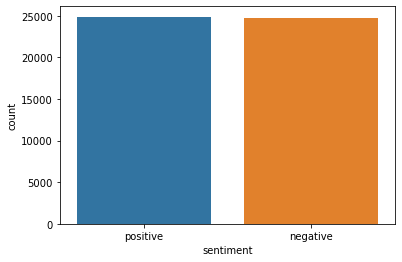

In [13]:
sns.countplot(data['sentiment'])

In [14]:
#cleaning the dataset
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["review"] = data["review"].apply(clean)

In [15]:
#check after cleaing dataset
data['review'][1]

'wonder littl product film techniqu unassum oldtimebbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrif written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particular scene concern orton halliwel set particular flat halliwel mural decor everi surfac terribl well done'

In [16]:
#splting the dataset in X and Y
X = data['review']
Y = data['sentiment']

In [17]:
#print X and Y
print(X)
print(Y)

0        one review mention watch  oz episod youll hook...
1        wonder littl product film techniqu unassum old...
2        thought wonder way spend time hot summer weeke...
3        basic there famili littl boy jake think there ...
4        petter mattei love time money visual stun film...
                               ...                        
49995    thought movi right good job wasnt creativ orig...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    im go disagre previous comment side maltin one...
49999    one expect star trek movi high art fan expect ...
Name: review, Length: 49582, dtype: object
0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 49582, dtype: object


In [18]:
#loading CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X) 

In [19]:
print(X)

  (0, 108192)	1
  (0, 126389)	1
  (0, 94897)	1
  (0, 165796)	3
  (0, 111215)	5
  (0, 47502)	2
  (0, 172607)	1
  (0, 71011)	1
  (0, 126994)	2
  (0, 49075)	1
  (0, 66187)	1
  (0, 95387)	1
  (0, 54703)	2
  (0, 152452)	1
  (0, 145658)	2
  (0, 19898)	1
  (0, 160360)	1
  (0, 131292)	1
  (0, 163990)	4
  (0, 134955)	1
  (0, 170146)	1
  (0, 61645)	1
  (0, 157805)	1
  (0, 136904)	4
  (0, 50984)	1
  :	:
  (49581, 51366)	2
  (49581, 71998)	1
  (49581, 157698)	1
  (49581, 24552)	1
  (49581, 130769)	1
  (49581, 82764)	1
  (49581, 160418)	1
  (49581, 85566)	1
  (49581, 76037)	1
  (49581, 10306)	1
  (49581, 125391)	1
  (49581, 74104)	1
  (49581, 8561)	1
  (49581, 157086)	1
  (49581, 82311)	1
  (49581, 142432)	1
  (49581, 93536)	1
  (49581, 33512)	1
  (49581, 21357)	1
  (49581, 103975)	1
  (49581, 100607)	1
  (49581, 24706)	1
  (49581, 62525)	1
  (49581, 125399)	1
  (49581, 172494)	1


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()

In [22]:
Y = le.fit_transform(Y) 

In [23]:
print(Y)

[1 1 1 ... 0 0 0]


In [24]:
#spliting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [25]:
#Check shape of X_train and X_test or Y_train
print(X_train.shape, X_test.shape, Y_train.shape)

(33219, 173746) (16363, 173746) (33219,)


In [32]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [33]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, Y_train)

/Users/vikky/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
from sklearn.metrics import accuracy_score

In [38]:
#traing dataset accuracy score
train_test = clf.predict(X_train)

In [39]:
accuracy_score(train_test,Y_train)

1.0

In [41]:
#test dataset accuracy score
test_data = clf.predict(X_test)

In [42]:
accuracy_score(test_data, Y_test)

0.7246837377009105

In [43]:
#traing dataset accuracy score
train_test = lg.predict(X_train)

In [44]:
accuracy_score(train_test,Y_train)

0.9944911044883952

In [47]:
#test dataset accuracy score
test_data = lg.predict(X_test)